<a href="https://colab.research.google.com/github/tribber93/AdaTest/blob/main/Image_Classification_Test_Yoni_Tribber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install datasets
%pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.2 MB/s eta 0:00:00


In [30]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) y
Token is valid (permission: fineG

# Image Classification Using Pre-trained Vision Transformer (ViT) Model to Classify Trash Type

## Step-by-Step Approach

1. **Define the Problem**:
   - Classify images into predefined categories based on the [TrashNet dataset](https://huggingface.co/datasets/garythung/trashnet), which includes categories such as paper, glass, plastic, metal, cardboard, and trash.
   - Use the Vision Transformer (ViT) as the base model to leverage transfer learning.

2. **Justification**:
   - **Why ViT?**
     - ViT is a state-of-the-art model that leverages transformer architecture, which has shown superior performance in image classification tasks.
     - It is capable of capturing long-range dependencies in images and excels at handling large datasets.
     - Particularly suitable for trash classification due to its ability to learn complex visual patterns and textures from image patches.
   - **Why Transfer Learning?**
     - Saves computational resources and training time by starting with a model pre-trained on a large dataset like ImageNet-21k.
     - Leverages prior knowledge from large-scale datasets, enabling the model to generalize well on smaller, domain-specific datasets.

3. **Pros & Cons**:
   - **Pros**:
     - Achieves high accuracy even with limited labeled data by leveraging pre-trained weights.
     - Leverages a modern and powerful architecture known for outperforming traditional CNNs in various image classification tasks.
   - **Cons**:
     - Might not perform optimally if the target dataset is too different from the domain the model was originally trained on.
     - Requires careful tuning of hyperparameters and may be computationally expensive for fine-tuning on smaller datasets.


# Data Preparation

## Import Libraries

In [4]:
import os
import matplotlib.pyplot as plt
from datasets import load_dataset
from IPython.display import display, Markdown
import seaborn as sns

## Load Dataset
Load dataset from [TrashNet dataset](https://huggingface.co/datasets/garythung/trashnet)

In [37]:
dataset = load_dataset("garythung/trashnet", split="train")#
resized_dataset = load_dataset("garythung/trashnet", split="train", data_files='dataset-resized.zip')

Generating train split: 0 examples [00:00, ? examples/s]

In [6]:
print(f"{10*'='} Dataset {10*'='}")
display(dataset)
print(f"{10*'='} Dataset Features {10*'='}")
display(dataset.features)

========== Dataset ==========


Dataset({
    features: ['image', 'label'],
    num_rows: 5054
})

========== Dataset Features ==========


{'image': Image(mode=None, decode=True, id=None),
 'label': ClassLabel(names=['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash'], id=None)}

From the dataset we know that:
- The dataset contains 5054 data train with 2 attributes *image and label*
- The labels are categorized into 6 classes, including cardboard, glass, metal, paper, plastic, and trash

In [7]:
from collections import Counter

# Count the occurrences of each label
label_counts = Counter(dataset['label'])

# Convert label indices to label names if the dataset has a 'label' feature with names
label_counts_variable = {
    dataset.features['label'].names[label]: count for label, count in label_counts.items()
}

# Print the label names and their respective counts
for label, counts in label_counts_variable.items():
    print(f"{label}: {counts}")

cardboard: 806
glass: 1002
metal: 820
paper: 1188
plastic: 964
trash: 274


*Insight :*

The dataset has imbalanced categories, with paper having the most samples (1188) and trash the least (274).

## Split Dataset
Split the dataset into two parts: one for training and the other for testing.

In [8]:
splitted_dataset = dataset.train_test_split(test_size=0.2)

## **Label Mapping**
Convert between label ids and their corresponding names

In [9]:
labels = dataset.features["label"].names
num_labels = len(labels)
label2id, id2label = dict(), dict()

for i, label in enumerate(labels):
    label2id[label] = str(i)
    id2label[str(i)] = label

In [10]:
print(f'{10*"="} Label to Id {10*"="}')
display(label2id)
print(f'{10*"="} Id to Label {10*"="}')
display(id2label)

========== Label to Id ==========


{'cardboard': '0',
 'glass': '1',
 'metal': '2',
 'paper': '3',
 'plastic': '4',
 'trash': '5'}

========== Id to Label ==========


{'0': 'cardboard',
 '1': 'glass',
 '2': 'metal',
 '3': 'paper',
 '4': 'plastic',
 '5': 'trash'}

## Augmentation

Data Augmentation is a technique used to artificially increase the size of a dataset by applying various transformations to the original data. This is commonly used in machine learning to improve model generalization and prevent overfitting.

In [12]:
from transformers import AutoImageProcessor

# Load the pre-trained image processor for the Vision Transformer (ViT) model
model_name = "google/vit-base-patch16-224-in21k"
image_processor = AutoImageProcessor.from_pretrained(model_name)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


In [13]:
from torchvision.transforms import RandomResizedCrop, Compose, Normalize, ToTensor

# Define the normalization parameters using the image processor's mean and std
normalize = Normalize(mean=image_processor.image_mean, std=image_processor.image_std)


size = (
    image_processor.size["shortest_edge"]
    if "shortest_edge" in image_processor.size
    else (image_processor.size["height"], image_processor.size["width"])
)

# Define the series of transformations: resize, convert to tensor, and normalize
_transforms = Compose([RandomResizedCrop(size), ToTensor(), normalize])

In [14]:
def transforms(examples):
    # Apply the defined transformations (resize, to tensor, normalize) to each image in the examples
    examples["pixel_values"] = [_transforms(img.convert("RGB")) for img in examples["image"]]
    del examples["image"]
    return examples

In [15]:
from transformers import DefaultDataCollator

data_collator = DefaultDataCollator()

In [17]:
splitted_dataset = splitted_dataset.with_transform(transforms)

## WeightedRandomSampler

Due to the class imbalance, particularly with the 'trash' label, the *WeightedRandomSampler* is chosen to address this issue by giving higher sampling probabilities to the underrepresented class.

In [18]:
from torch.utils.data import WeightedRandomSampler, DataLoader
import torch

# Get the class counts from the dataset
class_counts = list(label_counts_variable.values())
total_count = sum(class_counts)

# Calculate class weights to handle class imbalance
class_weights = [total_count / count for count in class_counts]
weights = torch.tensor([class_weights[int(label)] for label in dataset['label']])

# Create a WeightedRandomSampler to sample data based on class weights
sampler = WeightedRandomSampler(weights=weights, num_samples=len(weights), replacement=True)

# Create DataLoaders with the sampler for balanced sampling
train_loader = DataLoader(splitted_dataset['train'], batch_size=32, sampler=sampler, num_workers=4)
val_loader = DataLoader(splitted_dataset['test'], batch_size=32, sampler=sampler, num_workers=4)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


# Exploratory Image Analysis


Here is an example of the dataset that is loaded for each label.

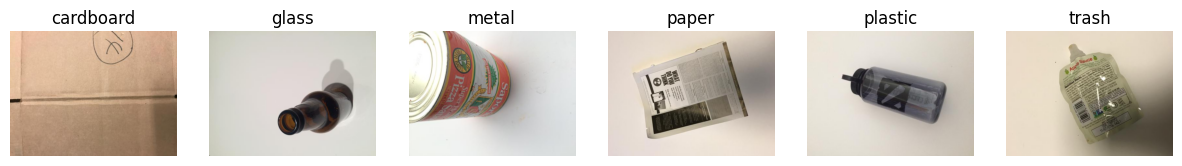

In [38]:
import matplotlib.pyplot as plt

shown_labels = set()

plt.figure(figsize=(15, 10))

# Loop through the dataset and plot the first image of each label
for i, sample in enumerate(resized_dataset):
    label = dataset.features["label"].names[sample["label"]]
    if label not in shown_labels:
        plt.subplot(1, len(dataset.features["label"].names), len(shown_labels) + 1)
        plt.imshow(sample["image"])
        plt.title(label)
        plt.axis("off")
        shown_labels.add(label)
        if len(shown_labels) == len(dataset.features["label"].names):
            break

plt.show()

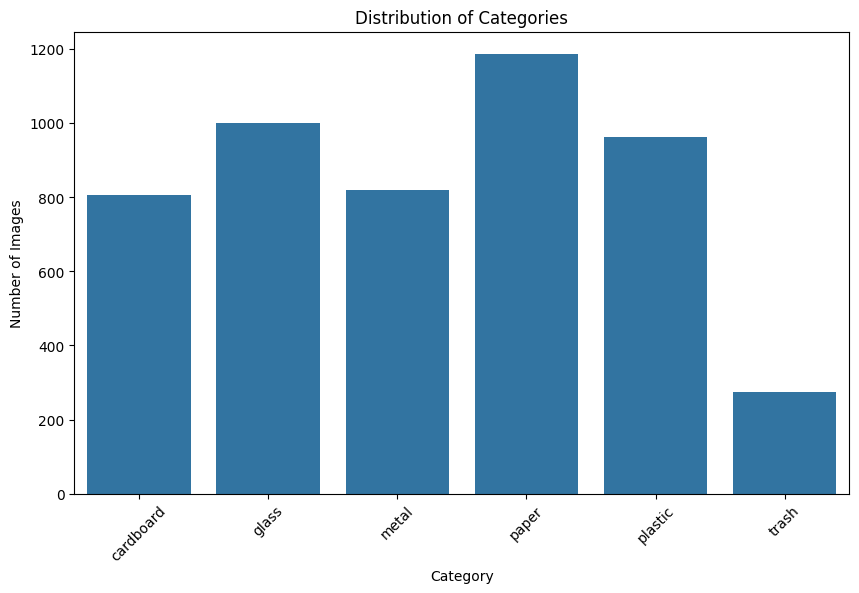

In [88]:
# Get the count of data for each category
category_names = list(label_counts_variable.keys())
category_values = list(label_counts_variable.values())

# Plot the distribution of categories
plt.figure(figsize=(10, 6))
sns.barplot(x=category_names, y=category_values)
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.title('Distribution of Categories')
plt.xticks(rotation=45)
plt.show()

**Insight:**

Class Imbalance: The dataset shows a significant imbalance in the number of images across different categories. The 'trash' category has notably fewer images compared to other categories.

# Model training & evaluation analysis

## Load pre-trained model

In [22]:
from transformers import AutoModelForImageClassification, TrainingArguments, Trainer

# Load a pre-trained image classification model from Hugging Face
model = AutoModelForImageClassification.from_pretrained(
    model_name,
    num_labels=len(labels),
    id2label=id2label,
    label2id=label2id,
)

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Train

In [20]:
import evaluate

accuracy = evaluate.load("accuracy")

In [21]:
import numpy as np


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [24]:
# Set up the training arguments for the Trainer
training_args = TrainingArguments(
    output_dir="my_trash_model",
    remove_unused_columns=False,
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=16,
    gradient_accumulation_steps=4,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    warmup_ratio=0.1,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    push_to_hub=False,
)

# Initialize the Trainer with the specified model, training arguments, and datasets
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=splitted_dataset["train"],
    eval_dataset=splitted_dataset["test"],
    processing_class=image_processor,
    compute_metrics=compute_metrics,
)

# Start training the model
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy
1,3.320000,0.701078,0.862512
2,1.435300,0.356352,0.942631


TrainOutput(global_step=189, training_loss=2.8910884251670232, metrics={'train_runtime': 2716.6292, 'train_samples_per_second': 4.465, 'train_steps_per_second': 0.07, 'total_flos': 9.291622654347264e+17, 'train_loss': 2.8910884251670232, 'epoch': 2.9644268774703555})

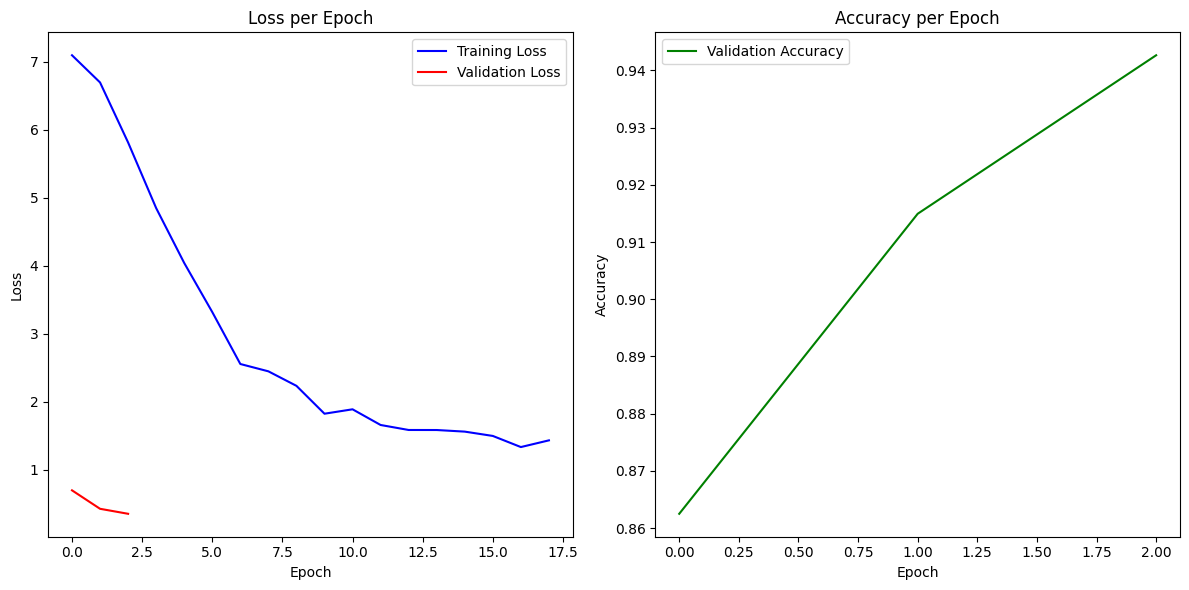

In [39]:
# Get the training results from the Trainer
train_results = trainer.state.log_history

# Extract loss and accuracy data
train_loss = [result['loss'] for result in train_results if 'loss' in result]
eval_loss = [result['eval_loss'] for result in train_results if 'eval_loss' in result]
accuracy = [result['eval_accuracy'] for result in train_results if 'eval_accuracy' in result]

# Create a plot for visualization
plt.figure(figsize=(12, 6))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(train_loss, label="Training Loss", color='b')
plt.plot(eval_loss, label="Validation Loss", color='r')
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy, label="Validation Accuracy", color='g')
plt.title("Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [36]:
trainer.push_to_hub(repo_id="my_trash_model")

HfHubHTTPError: (Request ID: Root=1-6767ea63-4d355a066f7c857658527959;62ccc7d8-590a-442d-804d-f31e62e5c292)

403 Forbidden: You don't have the rights to create a model under the namespace "tribber93".
Cannot access content at: https://huggingface.co/api/repos/create.
Make sure your token has the correct permissions.

In [27]:
trainer.save_model("/content/drive/MyDrive/HF_model/my_trash_model")

In [28]:
!cp -R /content/my_trash_model /content/drive/MyDrive/AdaTest/
!cp -R /content/wandb /content/drive/MyDrive/AdaTest/